# `ecg_00.jpynb`: Read and plot ECG data

In this Jupyter notebook, we read and plot ECG data from a healthy subject.

## 1. Open an ECG file into the `ecg` variable
We want to read the file `ECG_hz.txt` from the `data` folder.  
We shall put the data into a variable named `ecg`.


### 1.1. Define the path to the ECG file

The path to the file is `data/ECG_hz.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECG_hz.txt`

In [9]:
fNameECG = "/Users/duhameleve/Desktop/M2 SNS/S1 /Github/HAH913E-2024-ECG_001/data/ECGu.txt"


However, if we `%run` this notebook from another notebook, the path is expected from the other notebook. So we need a way to define the path to the file in a way that is independent of the notebook that is running the present notebook.

In [10]:
# if the present working directory is the directory of this file, change the path to the project root
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "/Users/duhameleve/Desktop/M2 SNS/S1 /Github/HAH913E-2024-ECG_001/data/ECGu.txt"

### 1.2. Read the ecg file

In [11]:
import numpy as np 

ecg = np.genfromtxt(fNameECG, delimiter=' ')

# 2. Plot the content of the `egc` variable 

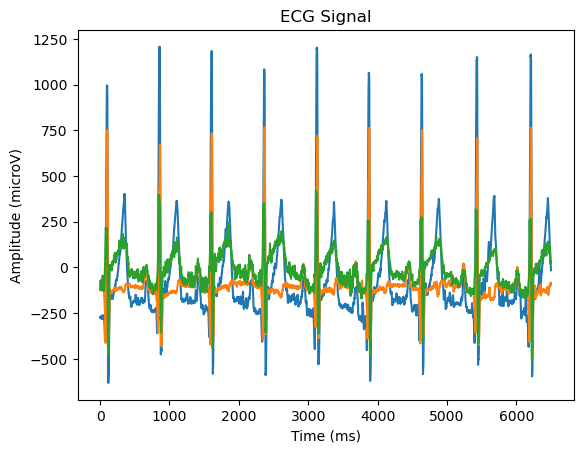

ecg_00.ipynb finished


In [12]:
import matplotlib.pyplot as plt 

plt.plot(ecg)
plt.title('ECG Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (microV)')
plt.show()

print("ecg_00.ipynb finished")

# QUESTIONS
## Does this ECG look correctly scaled to you? Please explain

Cet ECG présente une échelle cohérente. 

En ce qui concerne l'axe des ordonnées, Le signal enregistré est exprimé en microvolts (μV), car l'ECG mesure les minuscules variations de potentiel électrique générées par l'activité du cœur. Si celui-ci était exprimé en millivolts (mV), les amplitudes apparaîtraient anormalement élevées par rapport aux valeurs typiques observées dans un ECG standard.

Pour l'axe des abscisses (temps), l'échelle doit permettre d'observer correctement la fréquence cardiaque et la durée des intervalles entre les complexes QRS. Une échelle trop large pourrait réduire la visibilité des détails, tandis qu'une échelle trop étroite pourrait donner une perception erronée du rythme cardiaque. Étant donné que la fréquence cardiaque est de 80 bpm, chaque complexe QRS doit être espacé d'environ 0,75 seconde (ou 750 ms) en moyenne. Ainsi, l'échelle en millisecondes facilite la visualisation des ondes QRS.


## Is this a normal ECG? Please explain.

Cet ECG, conformément aux spécifications du fabricant, présente les dérivations D1, D2 et D3, correspondant aux enregistrements effectués sur les membres de l'individu. L'enregistrement semble conforme, avec la durée des complexes QRS apparaissant comme inférieure à 120 ms, ce qui est conforme aux valeurs physiologiques attendues pour ce type de signal. 

De plus sur une période de 6 secondes, 8 complexes QRS sont observés, ce qui correspond à une fréquence cardiaque de 80 battements par minute (bpm). Chez un sujet au repos, la fréquence cardiaque normale se situe entre 50 et 90 bpm, indiquant que cet ECG est compatible avec un rythme cardiaque normal.